In [2]:
%load_ext autoreload
import datetime
# import ete3
import itertools
import json
import logging
import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import typing
# import re
import xml.etree.ElementTree as ET
# import xml.dom.minidom
# import xmlschema

In [3]:
%autoreload
from maxes.xes_loader2 import XesLoader, XesLog
# from maxes.xes_file import XesFile
# from maxes.analyze_xes import AnalyzeXes
# import maxes.analyze_sequence
# import maxes.serialization.serialize
# import maxes.graphs
import maxes.notebooks.utils
import maxes.utils

Config:
{'project_directory_path': '/vt/md/maxes/maxes', 'data_directory_path': '/vt/md/maxes/maxes/data'}


In [4]:
maxes.notebooks.utils.init_notebook() # RUN ONLY ONCE

Loading config from: C:\vt\md\maxes\maxes\config.local.yml
Config:
{'project_directory_path': '/vt/md/maxes/maxes', 'data_directory_path': '/vt/md/maxes/maxes/data'}


In [5]:
pra, prb, prc, prd = 0.25, 0.25, 0.25, 0.25

pra = prb / 2 + prc / 1 + prd / 3
print(pra)

prb = prd / 3
print(prb)

prc = prb / 2 + prd / 3
print(prc)

prd = 0
print(prd)

0.4583333333333333
0.08333333333333333
0.125
0


In [6]:
file_path = maxes.notebooks.utils.get_data_path("other/simple.xes")
log = maxes.notebooks.utils.load_xes(file_path)

df = log.traces[0].df
df.reindex(["concept:name", "lifecycle:transition", "time:timestamp", "org:resource", "call centre", "location", "outcome", "duration"], axis=1)

,concept:name,lifecycle:transition,time:timestamp,org:resource,call centre,location,outcome,duration
0,incoming claim,complete,1970-01-01 00:00:00+00:00,customer,Brisbane,NaN,NaN,NaN
1,B check if sufficient information is available,start,1970-01-01 00:00:00+00:00,Call Centre Agent Brisbane,NaN,Brisbane,NaN,NaN
2,B check if sufficient information is available,complete,1970-01-01 00:00:41+00:00,Call Centre Agent Brisbane,NaN,Brisbane,NaN,NaN
3,B register claim,start,1970-01-01 00:00:41+00:00,Call Centre Agent Brisbane,NaN,NaN,NaN,NaN
4,B register claim,complete,1970-01-01 00:12:59+00:00,Call Centre Agent Brisbane,NaN,NaN,NaN,NaN
5,determine likelihood of claim,start,1970-01-01 00:47:04+00:00,Claims handler,NaN,NaN,NaN,NaN
6,determine likelihood of claim,complete,1970-01-01 00:47:12+00:00,Claims handler,NaN,NaN,NaN,NaN
7,end,start,1970-01-01 00:47:12+00:00,Claims handler,NaN,NaN,not liable,2832
8,end,complete,1970-01-01 00:47:12+00:00,Claims handler,NaN,NaN,not liable,2832


In [7]:
%autoreload
from maxes.generators.xes_generator.xes_generator1 import XesGenerator1

generator = XesGenerator1()
generator.fit(log);

In [8]:
%autoreload
from maxes.analyze_sequence import analyze_xes_log_sequence

graph = analyze_xes_log_sequence(log)

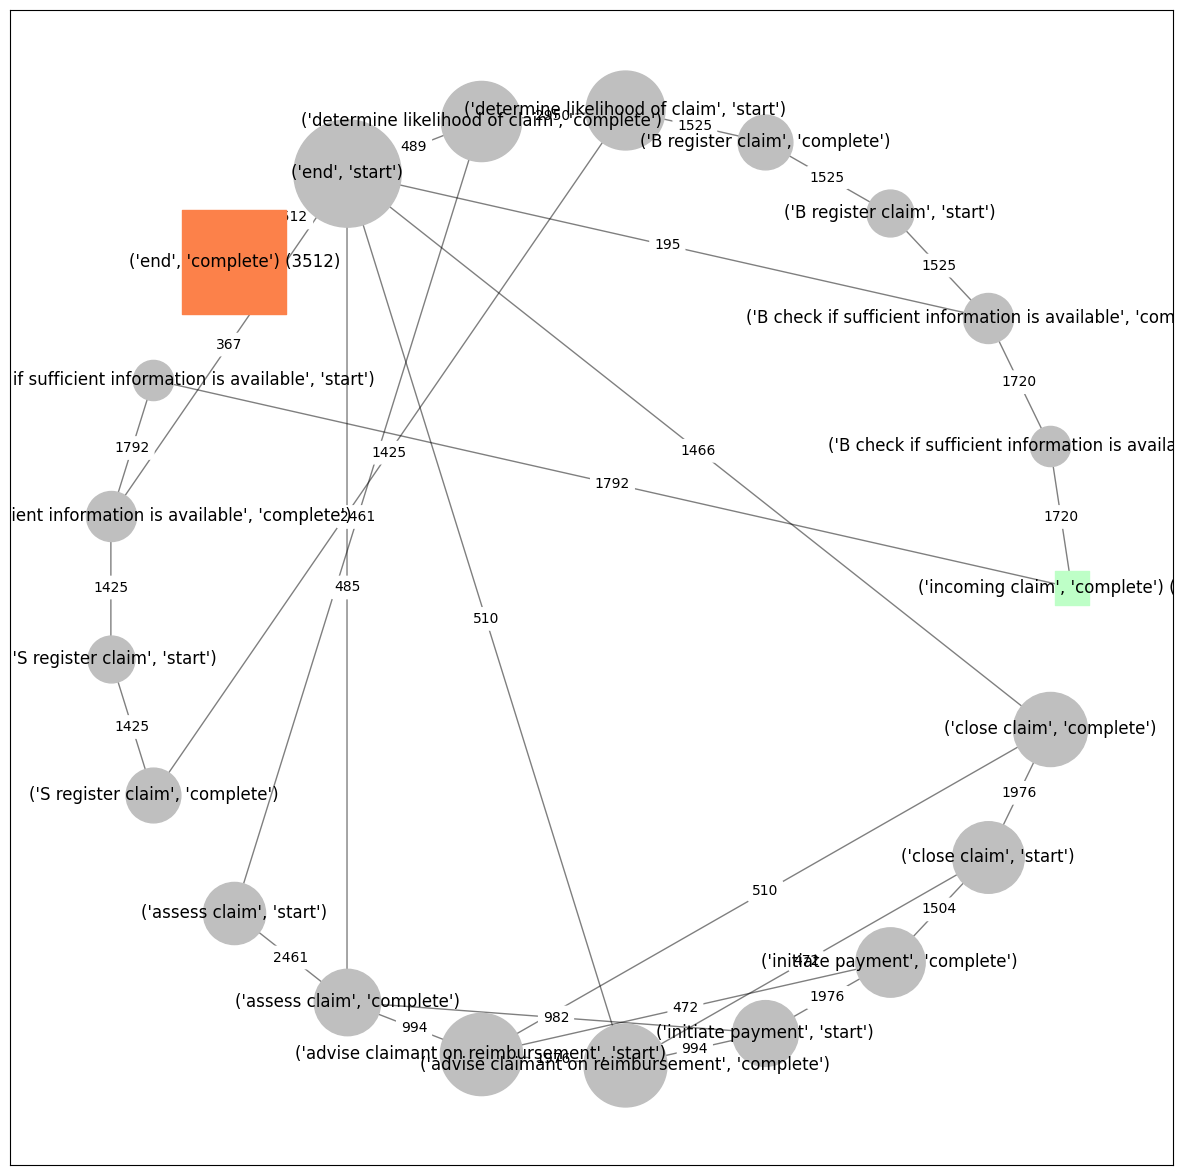

In [67]:
%autoreload
from maxes.analyze_sequence import draw_nx_graph

pr = nx.pagerank(graph)

for node, page_rank in pr.items():
    graph.nodes[node]["page_rank"] = page_rank

node_size = {k: v * 50_000 for k, v in pr.items()}

fig, ax = plt.subplots()
fig.set_size_inches(15, 15)

# draw_nx_graph(graph, edge_label="frequency", ax=ax, pos=nx.kamada_kawai_layout(graph), node_size=pr);
draw_nx_graph(graph, edge_label="frequency", ax=ax, pos=nx.circular_layout(graph), node_size=node_size);

In [30]:
pr

{('incoming claim', 'complete'): 0.011724335771344355,
 ('B check if sufficient information is available',
  'start'): 0.016707105931551065,
 ('B check if sufficient information is available',
  'complete'): 0.025925327819397943,
 ('B register claim', 'start'): 0.022742573600210744,
 ('B register claim', 'complete'): 0.03105543621513683,
 ('determine likelihood of claim', 'start'): 0.06451854033850432,
 ('determine likelihood of claim', 'complete'): 0.06656501062226292,
 ('end', 'start'): 0.11937001312358805,
 ('end', 'complete'): 0.1131867254775439,
 ('S check if sufficient information is available',
  'start'): 0.016707105931551065,
 ('S check if sufficient information is available',
  'complete'): 0.025925327819397943,
 ('S register claim', 'start'): 0.022742573600210744,
 ('S register claim', 'complete'): 0.03105543621513683,
 ('assess claim', 'start'): 0.040014456902606736,
 ('assess claim', 'complete'): 0.04573643806018662,
 ('advise claimant on reimbursement', 'start'): 0.070045

In [ ]:
%autoreload
from maxes.graphs import random_weighted_traverse

random_weighted_traverse(
    graph=graph,
    min_steps=7,
    max_steps=20,
    weight_feature_name="frequency",
)

[('incoming claim', 'complete'),
 ('B check if sufficient information is available', 'start'),
 ('B check if sufficient information is available', 'complete'),
 ('B register claim', 'start'),
 ('B register claim', 'complete'),
 ('determine likelihood of claim', 'start'),
 ('determine likelihood of claim', 'complete'),
 ('assess claim', 'start'),
 ('assess claim', 'complete'),
 ('advise claimant on reimbursement', 'start'),
 ('advise claimant on reimbursement', 'complete'),
 ('end', 'start'),
 ('end', 'complete')]

In [ ]:
# Frequency
# neighbor_choices_lookup = {node: {neighbor: data["frequency"]
#                                     for neighbor, data in graph[node].items()}
#                             for node in graph.nodes}

# PageRank
neighbor_choices_lookup = {node: {neighbor: graph.nodes[neighbor]["page_rank"]
                                    for neighbor in graph[node]}
                            for node in graph.nodes}

neighbor_choices_lookup

{('incoming claim',
  'complete'): {('B check if sufficient information is available',
   'start'): 0.016707105931551065, ('S check if sufficient information is available',
   'start'): 0.016707105931551065},
 ('B check if sufficient information is available',
  'start'): {('B check if sufficient information is available',
   'complete'): 0.025925327819397943},
 ('B check if sufficient information is available',
  'complete'): {('B register claim', 'start'): 0.022742573600210744, ('end',
   'start'): 0.11937001312358805},
 ('B register claim',
  'start'): {('B register claim', 'complete'): 0.03105543621513683},
 ('B register claim',
  'complete'): {('determine likelihood of claim',
   'start'): 0.06451854033850432},
 ('determine likelihood of claim',
  'start'): {('determine likelihood of claim',
   'complete'): 0.06656501062226292},
 ('determine likelihood of claim',
  'complete'): {('end', 'start'): 0.11937001312358805, ('assess claim',
   'start'): 0.040014456902606736},
 ('end', 's

In [65]:
%autoreload
from maxes.graphs import random_weighted_traverse

random_weighted_traverse(
    graph=graph,
    min_steps=7,
    max_steps=20,
    neighbor_choices_lookup=neighbor_choices_lookup
)

[('incoming claim', 'complete'),
 ('S check if sufficient information is available', 'start'),
 ('S check if sufficient information is available', 'complete'),
 ('S register claim', 'start'),
 ('S register claim', 'complete'),
 ('determine likelihood of claim', 'start'),
 ('determine likelihood of claim', 'complete'),
 ('end', 'start'),
 ('end', 'complete')]